# Denoising and regulon inference of 10x Visium invasive ductal carcinoma slice

In this tutorial, we demonstrate SpaRCL on the denoising and regulon inference of 10x Visium invasive ductal carcinoma stained with fluorescent CD3 antibody slice including

* Gene expression denoising
* Regulon inference and aucell

The dataset is available at [10x genomics website](https://www.10xgenomics.com/resources/datasets) (Spatial Gene Expression >> Visium Spatial Gene Expression Fluorescent Demonstration (v1 Chemistry) >> Space Ranger 1.2.0 >> Invasive Ductal Carcinoma Stained With Fluorescent CD3 Antibody).

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import glob

import SpaRCL as rcl

## Data loading and preprocessing

We load the dataset after spatial domain identification in previous tutorial.

In [2]:
adata = sc.read_h5ad('./IDC_results.h5ad')
adata

AnnData object with n_obs × n_vars = 4727 × 36601
    obs: 'in_tissue', 'array_row', 'array_col', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg', 'pca', 'relation', 'spatial', 'spatial_reconstruction'
    obsm: 'X_pca', 'spatial'
    varm: 'PCs'
    layers: 'counts', 'log1p'
    obsp: 'relation'

## Gene expression denoising

We perform gene expression denoising using gene relation matrix.

In [3]:
adata_denoised = rcl.expression_denoising(adata)

We show the spatial expression pattern of *STPS2* (differentially expressed in tumor domain) before and after denoising.

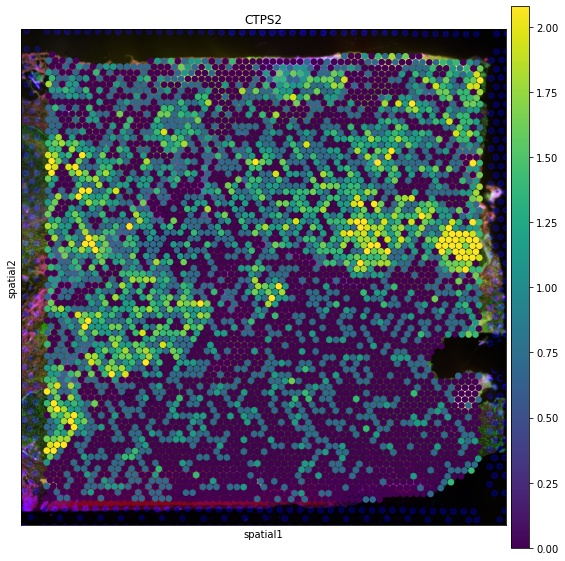

In [4]:
fig, axs = plt.subplots(figsize=(8, 8))

sc.pl.spatial(
    adata,
    img_key='hires',
    color='CTPS2',
    layer='log1p',
    size=1.5,
    palette=sc.pl.palettes.default_102,
    legend_loc='right margin',
    vmin='p10',
    vmax='p99',
    show=False,
    ax=axs,
)

plt.tight_layout()

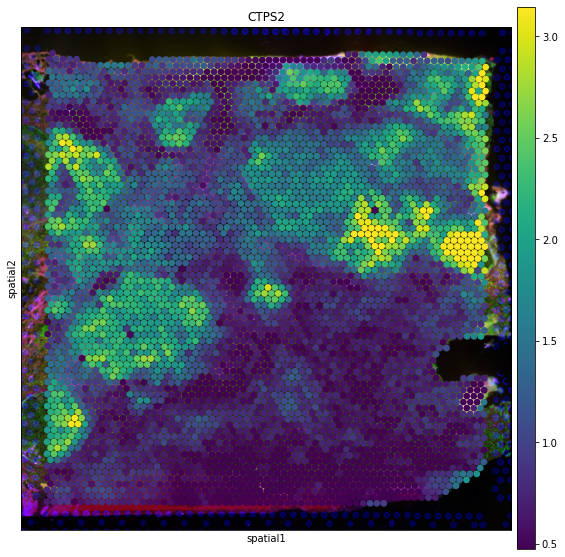

In [5]:
fig, axs = plt.subplots(figsize=(8, 8))

sc.pl.spatial(
    adata_denoised,
    img_key='hires',
    color='CTPS2',
    size=1.5,
    palette=sc.pl.palettes.default_102,
    legend_loc='right margin',
    vmin='p10',
    vmax='p99',
    show=False,
    ax=axs,
)

plt.tight_layout()

We also show the spatial expression pattern of *IGHM* (differentially expressed in immune domain) before and after denoising.

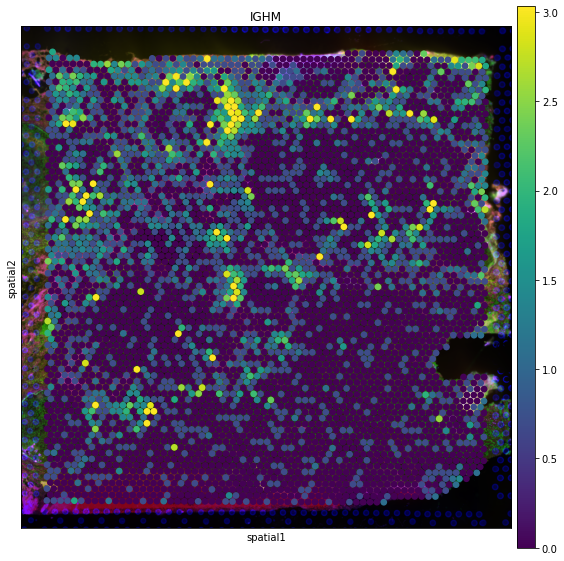

In [6]:
fig, axs = plt.subplots(figsize=(8, 8))

sc.pl.spatial(
    adata,
    img_key='hires',
    color='IGHM',
    layer='log1p',
    size=1.5,
    palette=sc.pl.palettes.default_102,
    legend_loc='right margin',
    vmin='p10',
    vmax='p99',
    show=False,
    ax=axs,
)

plt.tight_layout()

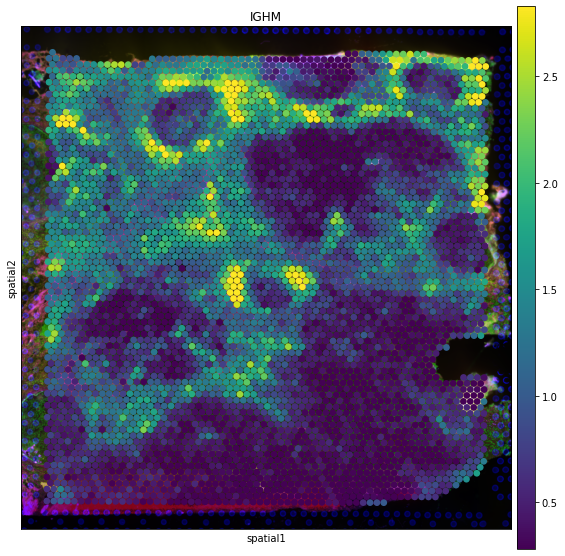

In [7]:
fig, axs = plt.subplots(figsize=(8, 8))

sc.pl.spatial(
    adata_denoised,
    img_key='hires',
    color='IGHM',
    size=1.5,
    palette=sc.pl.palettes.default_102,
    legend_loc='right margin',
    vmin='p10',
    vmax='p99',
    show=False,
    ax=axs,
)

plt.tight_layout()

## Regulon inference and aucell

We perform regulon inference using gene relation matrix.

In [9]:
DATABASES_GLOB = "./cisTarget/hg19-*.mc9nr.feather"
db_fnames = glob.glob(DATABASES_GLOB)

MOTIF_ANNOTATIONS_FNAME = "./cisTarget/motifs-v9-nr.hgnc-m0.001-o0.0.tbl"

tf_names = np.array(pd.read_table("./tf_names/hs_hgnc_tfs.txt", header=None).iloc[:,0])

In [10]:
rcl.regulons(
    adata,
    tf_names=tf_names,
    motif_annotations_fname=MOTIF_ANNOTATIONS_FNAME,
    db_fnames=db_fnames,
)


2022-07-10 13:31:39,642 - pyscenic.utils - INFO - Creating modules.


Create regulons from a dataframe of enriched features.
Additional columns saved: []


We perform aucell to compute the activity of each regulon on each spot.

In [11]:
rcl.aucell(adata, normalize=True)

100%|██████████████████████████████████████████████████████████████████████████████████| 64/64 [00:03<00:00, 20.68it/s]


We create a new object `adata_aucell` using the aucell matrix for visualization.

In [12]:
adata_aucell = sc.AnnData(adata.obsm['aucell'])
adata_aucell.obs = adata.obs.copy()
adata_aucell.obsm = adata.obsm.copy()
adata_aucell.uns['spatial'] = adata.uns['spatial'].copy()

We draw a heatmap to visualize the aucell matrix grouped by spatial domains.

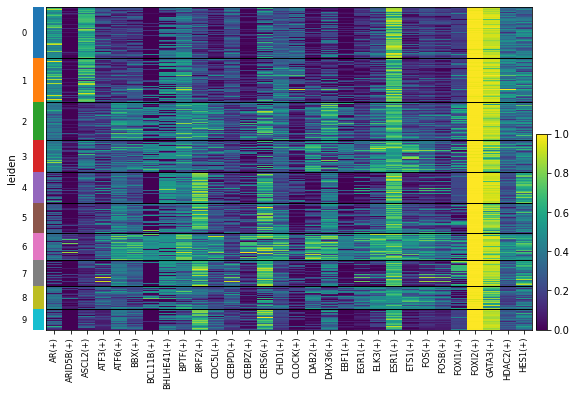

In [13]:
sc.pl.heatmap(
    adata_aucell,
    var_names=adata_aucell.var_names[:30],
    groupby='leiden',
    show_gene_labels=True,
)

We show the spatial activity pattern of ASCL2(+) regulon.

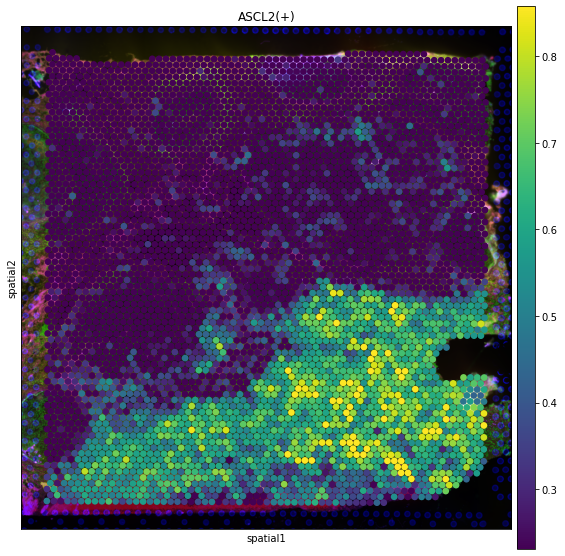

In [14]:
fig, axs = plt.subplots(figsize=(8, 8))

sc.pl.spatial(
    adata_aucell,
    img_key='hires',
    color='ASCL2(+)',
    size=1.5,
    palette=sc.pl.palettes.default_102,
    legend_loc='right margin',
    vmin='p50',
    vmax='p99',
    show=False,
    ax=axs,
)

plt.tight_layout()

We also show the spatial activity pattern of BRF2(+) regulon.

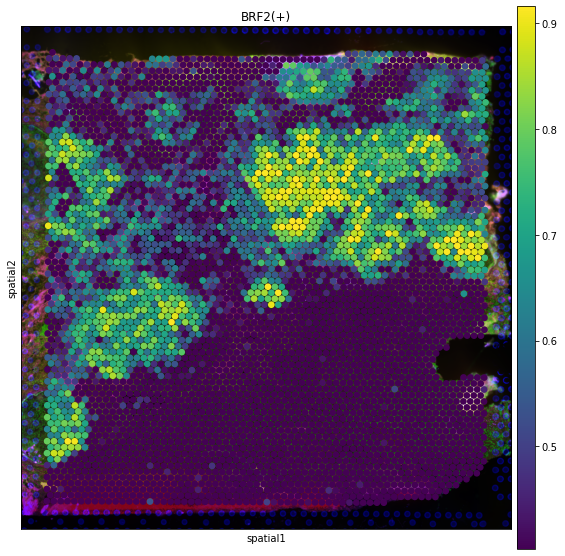

In [15]:
fig, axs = plt.subplots(figsize=(8, 8))

sc.pl.spatial(
    adata_aucell,
    img_key='hires',
    color='BRF2(+)',
    size=1.5,
    palette=sc.pl.palettes.default_102,
    legend_loc='right margin',
    vmin='p50',
    vmax='p99',
    show=False,
    ax=axs,
)

plt.tight_layout()